# Reading .mat files

An initial attempt to load the files into Python

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import modred as mr
import pandas as pd

In [2]:
1+1

2

In [11]:
import h5py
f = h5py.File('/Users/Owen/Dropbox/Data/ABL/Heat Flux Data/Processed Results/N/Neutral45_2.mat')
list(f.keys())

['Cond',
 'PercentMissing',
 'Prof',
 'Swirl',
 'U',
 'V',
 'Vort',
 'W',
 'X',
 'Y',
 'source']

In [4]:
swirl = np.asarray(f['Swirl'])
X  = np.asarray(f['X'])
Y  = np.asarray(f['Y'])
U  = np.asarray(f['U'])
V  = np.asarray(f['V'])

# Import all data in different structures

In [5]:
k = f["Cond"].keys()

In [6]:
d= f["Cond"]["delta"]

In [7]:
list(k)

['Cf',
 'Cf_PantonMax',
 'Cf_TotStress',
 'H',
 'Hama',
 'P',
 'Red',
 'Retau',
 'Retau_TotStress',
 'Retheta',
 'Tinf',
 'Uinf',
 'Utau',
 'Utau_PantonMax',
 'Utau_TotStress',
 'WakeFac',
 'a',
 'dXplus',
 'delstar',
 'delta',
 'delta99',
 'dk',
 'dks',
 'dt',
 'isHeat',
 'isRough',
 'k',
 'kplus',
 'ks',
 'ksplus',
 'mu',
 'nu',
 'origin',
 'rho',
 'theta',
 'ymin',
 'yminHard']

In [9]:
d.value

array([[ 0.12752905]])

In [76]:
L  = [i**2 for i in range(10)]       #list comprehensions  (also look up generator expressions)
L

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [87]:
D = {1:2, 'abc':4}        #Defining a dictionary object
D['abc']

4

In [83]:
D['Cf']

array([ 0.00766106])

In [8]:
k = f["Cond"].keys()     #Longer way to generate a pandas Series with all the values in Cond

Cond = pd.Series()
for i in list(k):
    #d = f["Cond"][i].value[0]
    #print(i, " = ", f["Cond"][i].value[0])
    s1 = pd.Series(f["Cond"][i].value[0], index = [i])
    Cond = Cond.append(s1)

In [72]:
Cond['Uinf']

1.5511073539843001

In [96]:
Cond = {k : f["Cond"][k].value[0]       #Generate a dictionary linking all values in cond with their names
     for k in f['Cond'].keys()}

In [97]:
Cond['Uinf']      #look up in pandas or dictionary object is the same 

array([ 1.55110735])

In [124]:
k = f["Prof"].keys()                 #Once again long way to generate pandas object with all profiles
Prof = pd.Series()
for i in list(k):
    d = f["Prof"][i].value
    #print(i, " = " , f["Prof"][i].value)
    s1 = pd.Series(f["Prof"][i].value, index = [i])
    Prof = Prof.append(s1)

Exception: Data must be 1-dimensional

In [99]:
Prof = {k : f["Prof"][k].value       #Generate a dictionary linking all values in cond with their names
     for k in f['Prof'].keys()}

In [122]:
Prof = pd.Series({k : f["Prof"][k].value       #Generate a pandas series from the dictionary
     for k in f['Prof'].keys()})

In [123]:
Prof['U']

array([[ 0.45342252],
       [ 0.57517629],
       [ 0.64734552],
       [ 0.69517523],
       [ 0.73423424],
       [ 0.76830475],
       [ 0.79868198],
       [ 0.82615088],
       [ 0.85109742],
       [ 0.87394854],
       [ 0.89507748],
       [ 0.9146698 ],
       [ 0.93290643],
       [ 0.95012068],
       [ 0.96660341],
       [ 0.98252511],
       [ 0.99790738],
       [ 1.01271951],
       [ 1.02705902],
       [ 1.04111397],
       [ 1.05500919],
       [ 1.06875369],
       [ 1.08225632],
       [ 1.09541443],
       [ 1.10811254],
       [ 1.12018675],
       [ 1.13156542],
       [ 1.14245016],
       [ 1.15310912],
       [ 1.16361449],
       [ 1.17397355],
       [ 1.18424813],
       [ 1.19451301],
       [ 1.20475746],
       [ 1.21488573],
       [ 1.22476869],
       [ 1.23428833],
       [ 1.24342934],
       [ 1.25232323],
       [ 1.26117083],
       [ 1.27001564],
       [ 1.27878151],
       [ 1.28750017],
       [ 1.29620807],
       [ 1.30482462],
       [ 1

0     [[0.00656057012771], [0.00891317125211], [0.00...
1     [[0.453422523309], [0.575176287133], [0.647345...
2     [[11.4342169862], [10.165948613], [9.414185741...
3     [[4.72315128446], [5.99141965763], [6.74318252...
4     [[-0.00369352708279], [-0.00350899331086], [-0...
5     [[0.0192880464671, 0.0294065628443, 0.03952507...
6     [[15.1784114335, 23.1410117378, 31.1036120422,...
7     [[0.00235978627205, 0.00365019106865, 0.004940...
8     [[94.3531550294], [75.1403745717], [46.4966292...
9     [[35.1236782462], [35.1236782462], [35.1236782...
10    [[113.389816437], [68.1967890102], [47.7661072...
11    [[0.0308817197247], [0.0310900588378], [0.0313...
12    [[-0.00408172232671], [-0.00637070780078], [-0...
13    [[0.00355036513536], [0.00534670466723], [0.00...
dtype: object

# Now start looking at the data

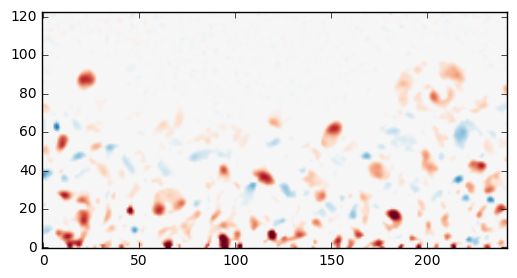

In [21]:
for i in range(1):
    plt.figure()
    plt.imshow(swirl[i].T, cmap='RdBu', origin='lower');
    plt.clim([-50, 50])

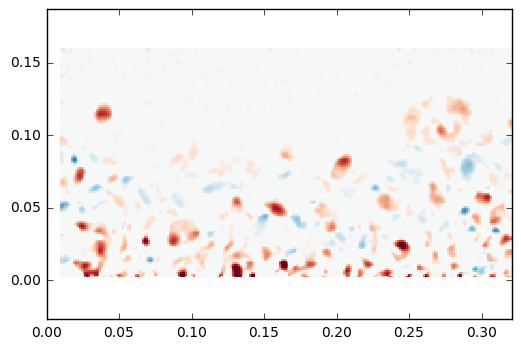

In [27]:
for i in range(1):
    plt.figure()
    plt.pcolor(X.T,Y.T,swirl[i].T, cmap='RdBu');
    plt.clim([-50, 50])
    plt.axis('equal')
    plt.axis([0, X.max(), 0, Y.max()])
    #plt.yaxis([0, Y.max()])

In [18]:
Y.max()

0.15978917145729066

In [29]:
num_modes = 50;
modes, eig_vals = mr.compute_POD_matrices_snaps_method(U, list(range(num_modes)))

ValueError: shape too large to be a matrix.

In [1]:
a = U.shape

NameError: name 'U' is not defined